# Deep Learning - Muhammad Qasim - 2021/01/23

# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weight-height.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
X = df.Height.values
X[0:5]

array([73.84701702, 68.78190405, 74.11010539, 71.7309784 , 69.88179586])

In [5]:
y_true = df.Weight.values
y_true[0:5]

array([241.89356318, 162.31047252, 212.74085556, 220.0424703 ,
       206.34980062])

# wX+b
- X provide by user (input)
- W, b try to find these weights through machine learning algoritham


In [6]:
#Line Equation
def line(x, w=0, b=0):
    return x * w + b

# Cost Function
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

#1) real-predic
#2) power
#3) Average
#4) sqrt


Text(0, 0.5, 'Loss')

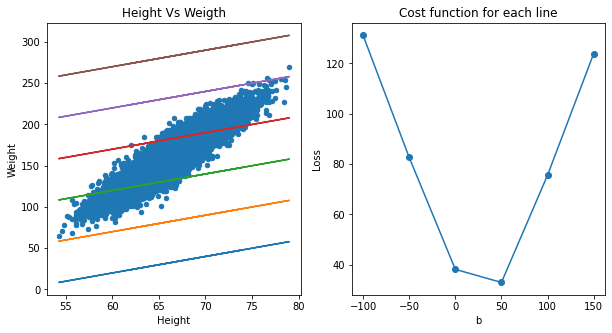

In [7]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)#row, column, select cell
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       ax=ax1,
       title="Height Vs Weigth")

bs = np.array([-100,-50, 0, 50,100, 150])

mses = []# we will store loss value for each line
for b in bs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse) # each line error/loss
    plt.plot(X, y_pred)

ax2 = plt.subplot(122) 
plt.plot(bs,mses, 'o-')
plt.title("Cost function for each line")
plt.xlabel("b")
plt.ylabel("Loss")

In [8]:
print(y_true)
print(y_pred)

[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]
[297.69403404 287.56380809 298.22021078 ... 277.73598443 288.06848626
 273.88849176]


# Try to find w and b (weights) with Deep learning

In [9]:
from tensorflow.keras.models import Sequential # Sequential/Functional Api
from tensorflow.keras.layers import Dense # type of layer
from tensorflow.keras.optimizers import Adam, SGD

2022-04-30 22:43:49.332618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-30 22:43:49.332647: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
X = df.Height.values
y_true = df.Weight.values

print(X[:2],y_true[:2], sep="\n\n")

[73.84701702 68.78190405]

[241.89356318 162.31047252]


In [11]:
X.shape

(10000,)

In [12]:
#Model Structure
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

2022-04-30 22:43:51.137101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 22:43:51.137563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-30 22:43:51.137627: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-30 22:43:51.137688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-04-30 22:43:51.137748: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compilation steps
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [15]:
#Model Training
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 1ms/step - loss: 1424.2565
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 565.6185
Epoch 3/40
313/313 [==============================] - 0s 951us/step - loss: 547.3058
Epoch 4/40
313/313 [==============================] - 0s 1ms/step - loss: 497.8027
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 466.0864
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 426.8657
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 392.9170
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 348.5427
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 318.3227
Epoch 10/40
313/313 [==============================] - 0s 1ms/step - loss: 292.0180
Epoch 11/40
313/313 [==============================] - 0s 1ms/step - loss: 275.2511
Epoch 12/40
313/313 [==============================] - 0s 1ms/step - loss: 260.424

In [16]:
y_pred = model.predict(X)
y_pred

array([[215.58884],
       [176.95663],
       [217.59549],
       ...,
       [139.47763],
       [178.8812 ],
       [124.80496]], dtype=float32)

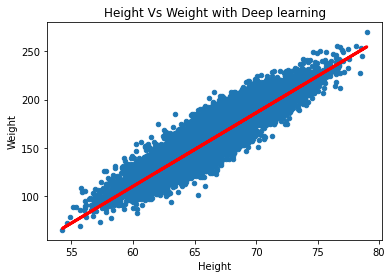

In [17]:
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight with Deep learning")
plt.plot(X, y_pred, color="red", linewidth=3)

In [18]:
w, b = model.get_weights()
print(w,b)

[[7.62712]] [-347.6512]


In [19]:
model.predict([[120]])

array([[567.60315]], dtype=float32)

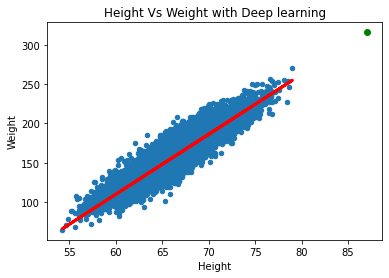

In [20]:
i = int(input("Enter Height in Number"))
j = model.predict([[i]])

df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight with Deep learning")
plt.plot(X, y_pred, color="red", linewidth=3)
plt.scatter(i,j, color='green')

In [21]:
#colab.com
#import tensorflow
#tensorflow.__version__
#pip install --upgrade tensorflow
#tensorflow.__version__

In [22]:
model.save("./weight_height_model.h5")